In [25]:
import numpy as np
np.random.seed(0)
from queue import Queue
import matplotlib.pyplot as plt
%matplotlib inline
import gc
gc.collect()

10451

In [26]:
# p202 西瓜数据集4.0
X=np.array([[0.697,0.460],[0.774,0.376],[0.634,0.264],[0.608,0.318],[0.556,0.215],
                [0.403,0.237],[0.481,0.149],[0.437,0.211],[0.666,0.091],[0.243,0.267],
                [0.245,0.057],[0.343,0.099],[0.639,0.161],[0.657,0.198],[0.360,0.370],
                [0.593,0.042],[0.719,0.103],[0.359,0.188],[0.339,0.241],[0.282,0.257],
                [0.748,0.232],[0.714,0.346],[0.483,0.312],[0.478,0.437],[0.525,0.369],
                [0.751,0.489],[0.532,0.472],[0.473,0.376],[0.725,0.445],[0.446,0.459]])


In [27]:
class DBSCAN:
    def __init__(self, e, MinPts):
        self.e = e
        self.MinPts = MinPts
    
    def fit(self, X):
        #图9.9
        n_samples = X.shape[0]
        omega = [] #line 1
        Ne = {} 
        for j in range(n_samples): # line2-7
            N = [] #存储第j个样本的所有e领域样本
            for i in range(n_samples):
                if i!=j:
                    dji = np.sqrt(np.sum(np.square(X[j] - X[i])))
                    if dji <= self.e:
                        N.append(i) 
            if len(N)>=self.MinPts:
                omega.append(j) 
            Ne[j] = N
   
        k = 0 #line 8
        C = {}
        gama = list(np.arange(n_samples)) #line 9

        
        while(len(omega)): #line 10-24
            gama_old = gama.copy() # line 11需要深拷贝 不然俩值到后面表示一个含义 因为没有子对象，所以.copy()够用
            o = omega[int(np.random.random()*len(omega))] # line 12
            
            Q = Queue()  #line 12
            Q.put(o)
            gama.remove(o) #line 13
            
            while(not Q.empty()): #line 14-21
                q = Q.get()
                if len(Ne[q]) >= self.MinPts: #line 16
                    triangle = list(set(Ne[q]).intersection(set(gama)))
                    for i in triangle: 
                        Q.put(i)
                        gama.remove(i)
                        
            C[k] = list(set(gama_old).difference(set(gama))) #line 22

            omega = list(set(omega).difference(C[k])) #line 23

            k += 1
            
        return C
        
        

In [28]:
dbscan = DBSCAN(e=0.11, MinPts=5)
C = dbscan.fit(X)

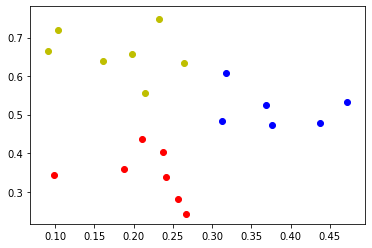

In [29]:
colors = ['r', 'b', 'y']
for i in range(len(C)):
    for j in range(len(C[i])):     
        plt.scatter(X[C[i][j]][1], X[C[i][j]][0], c=colors[i])
    